In [1]:
from IPython. display import Image
import pandas as pd

# Taxi Data Analysis Overview

## General analysis for busy time period

   While the data comes with many columns, we found that it could be interesting to try to look for the peak time for taxis or Uber during the day; or which days during the week are busier. The analysis can give an idea to people how they can avoid long waits if they are not running a rush errand. Or help passengers plan their schedule.

### The busiest hour during a day, weekday vs weekends.

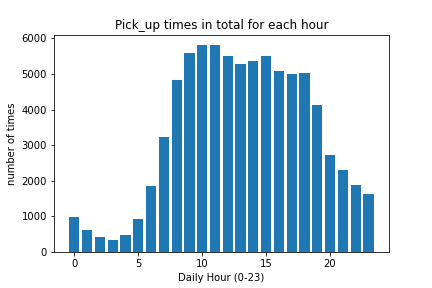

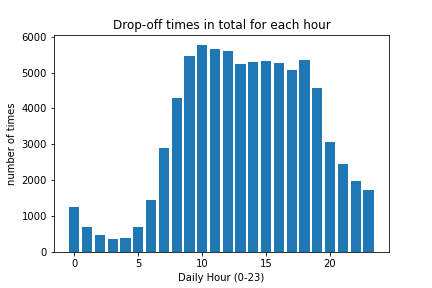

In [2]:
plot_1 = Image("figures/pick_up_times_per_hour.png" )
plot_2 = Image("figures/drop_off_times_per_hour.png")
display(plot_1,plot_2)

   The above two graphs give information about the busiest hour for taxis or uber to pick_up and Drop-off within a day. It's clear that starting at 6 A.M. more people are calling the taxis, and the whole day is busy until 8 P.M. 

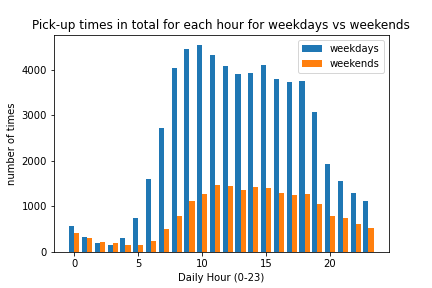

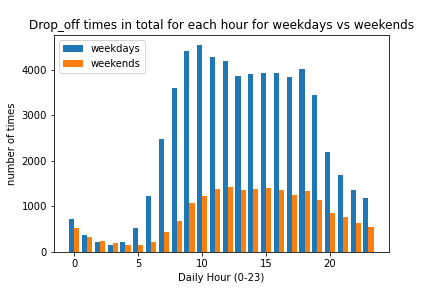

In [3]:
plot_3 = Image("figures/pick_up_weekdays_vs_weekends.png")
plot_4 = Image("figures/drop_off_weekdays_vs_weekends.png")
display(plot_3,plot_4)

   The above two plots show a comparison for weekdays and weekends regarding hours in a day. As the plots show, weekdays (in blue) are busier than weekends(in orange) at around the same time during the day.

## How do fares(cost/mile) change based on time.

   In addition to the time it takes to take a taxi or Uber, the cost is also a concern for most people. Here we analyze the average price at different times of the day, the average daily cost within a week and a month, and the unit cost per mile. The analysis is presented in a line chart, intuitively displaying the price changes in different periods.

### Fares vs hour of the day

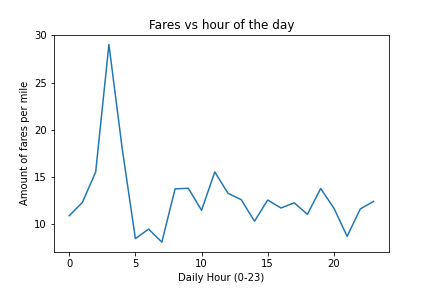

In [4]:
Image("figures/fares_vs_hour_of_the_day.png")

   The above picture shows the fares (fares) for different day hours in the form of a line chart. With a line graph, we can easily observe the change in cost over time within a day. For example, the graph above shows that, on average, taxi fares are highest around 4 am (about $30 per mile）), drop from 5 am to 7 am, and then rise to a relatively average level.

### Fares vs day of the week

   The chart below shows the change in the average fare over the seven days of the week, again using a line chart. As shown in the figure, the taxi fare is the highest on Sunday, and the taxi fare is relatively high from Monday to Wednesday on weekdays.

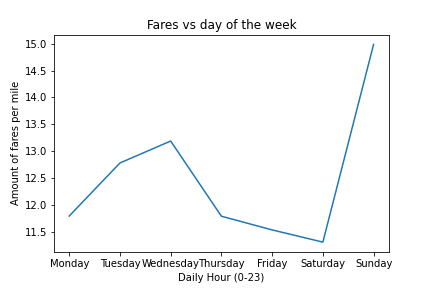

In [5]:
Image("figures/fares_vs_day_of_the_week.png")

### Fares vs day of the month

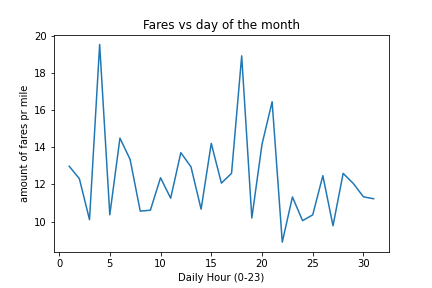

In [6]:
Image("figures/fares_vs_day_of_the_month.png")

   The line chart above shows the change in the average ride-hailing cost for each day of the month. It can be seen that there will be three or four peaks in a month, but it isn't easy to draw a broad conclusion from this graph because each month is different.

## Tip Analysis and EDA

When examining the dataset, one key area we thought had opportunity for insightful analysis was the relationship between tip amounts and other attributes. Through intuition and exploration of correlation, we found that tips were connected to trip distance and the total fare amount. Below are visualizations of their relationships. Some assumptions about the data itself were that all distances were in miles, and tips/fares were in dollars.

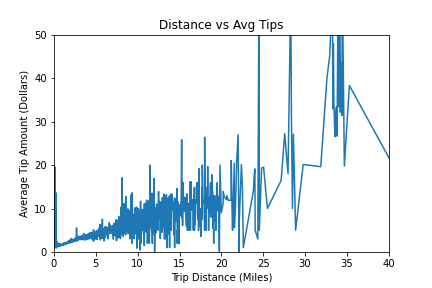

In [7]:
Image('figures/distance_tips_line.png')

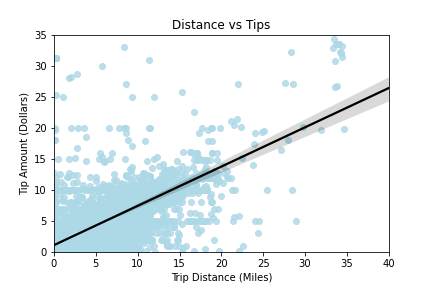

In [8]:
Image('figures/distance_tips_scatter.png')

While there was definitely high levels of variation in average tips (particularly in the range of 25-40 miles, as shown by the widening confidence intervals along the fitted line in the scatter plot above and dramatic changes in average tips in the line graph), we were able to see a substantial positive correlation between trip distance and average tip amounts. This aligns with the idea that as trips get longer, passengers will be willing to pay more in tips. We could most reliably count on a proportional increase of tips relative to trip distance in the range of 0 to 20 miles. Overall, we examined a correlation of around 0.692 when looking at all trip records.

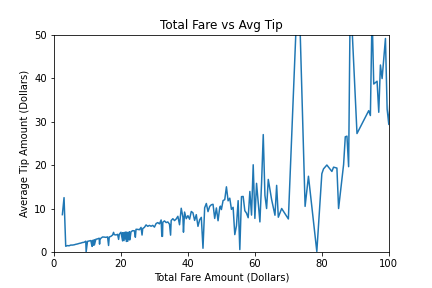

In [9]:
Image('figures/total__fare_line.png')

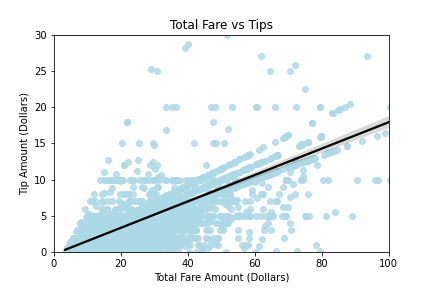

In [10]:
Image('figures/total__fare_scatter.png')

Despite the act that total fare amount is also significantly correlated to tip amounts, it still stood as another significant factor to consider when examining how tip amounts change over price. Overall, the visualizations looked similar to those of trip distance, but it was interesting to see that there was actually a higher correlation of 0.815. Given this, we wanted to see if the tips as a % of the total fare changed as the trips became more expensive.

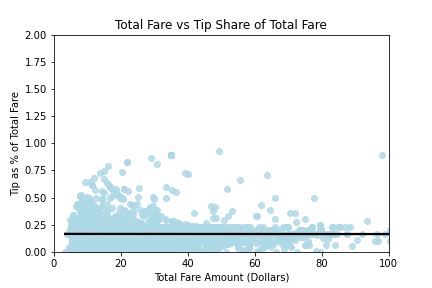

In [11]:
Image('figures/tipfare_relationship_scatter.png')

Unfortunately, there was a not a significant relationship between total fare amount and the tip share of total fare, as trip riders did not pay proportionally higher tips for trips with higher total fares. However, this does present another path to explore in the future, since it could be hypothesized that riders able to afford longer trips would be willing to tip a higher percentage.

## Tip Amount Prediction Model

Given a lot of the EDA regarding tip amounts, fare amounts, and locations/time of days we performed above, we had another major question in mind: Is it possible for us to accurately predict the tip amount for each taxi ride, given a lot of the paramters we analyzed above? We feel that creating such a model is justified, considering how our data is an exhaustive account of taxi rides in a particular location, and we have enough data to create a train/test set and develop significant analyses. Later, we will see that in our model, the coefficients we use are statistically significant, showing that our linear regression model is benefitting from the inclusion of such features in the design matrix.

In [12]:
pd.read_csv('tables/feature_corr.csv').head()

,Unnamed: 0,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day_of_week,day_of_month,hour_of_day,trip_duration,total_without_tip,fare_per_mile
0,passenger_count,1.000000,0.021590,0.022303,0.021908,0.004932,0.005806,0.011111,0.006232,0.018095,0.005751,0.004146,0.031171,0.019278,0.020509,0.040848,0.011009,0.018020,0.000514
1,trip_distance,0.021590,1.000000,0.925387,0.001624,0.040657,0.196647,0.608561,0.050845,0.917000,0.175209,0.048456,0.043460,0.007885,0.001906,0.035655,0.148440,0.929305,0.052687
2,fare_amount,0.022303,0.925387,1.000000,0.003971,0.040182,0.200605,0.556802,0.073033,0.979271,0.197215,0.053913,0.035779,0.002688,0.000577,0.019713,0.158437,0.993964,0.036188
3,extra,0.021908,0.001624,0.003971,1.000000,0.107925,0.082978,0.029265,0.054185,0.048214,0.064628,0.096973,0.236607,0.115133,0.008140,0.268154,0.011236,0.036864,0.017458
4,mta_tax,0.004932,0.040657,0.040182,0.107925,1.000000,0.005188,0.016458,0.516927,0.022813,0.101812,0.872987,0.075886,0.029974,0.008959,0.022047,0.007358,0.023070,0.143011


The above table is the first few rows of a correlation matrix among the features in the dataset that we generated. We found that specific features such as trip distance and total fare amount were highly associated with tip amount (which agrees with our analysis in the tip_analysis notebook, so we included both of these features in our model, along with a few other features that we saw were highly correlated and significant. However, we realized many of these variables were colinear, such as trip distance and fare amount (this was also discovered using the table displayed above). To address this concern, we removed one of the features for every pair of colinear features, so in this case we removed the trip_distance feature from our model. 

In [13]:
pd.read_csv('tables/model1coeffs.csv')

,Unnamed: 0,coef,std err,z,P>|z|,[0.025,0.975]
0,const,4.245100,0.088000,48.027,0.000,4.072000,4.418000
1,fare_amount,0.021100,0.004000,5.231,0.000,0.013000,0.029000
2,trip_duration,-0.000002,0.000002,-0.738,0.461,-0.000007,0.000003
3,hour_of_day,0.006300,0.002000,2.920,0.004,0.002000,0.010000
4,payment_type,-2.253400,0.022000,-103.339,0.000,-2.296000,-2.211000


In our first linear model, we can see that most of the features we used are statistically significant, meaning that changes with most of these variables are associated with changes with tip amount, and there exists a nonzero correlation between these variables. This further justifies our decision to try and create a model to predict tip amounts of taxi rides. However, when fitting this model on our test set, we got an RMSE of 2.0645248172212045. Our new goal was then to see if we could reduce this RMSE in another attempt at a linear model.

In [14]:
pd.read_csv('tables/model2coeffs.csv')

,Unnamed: 0,coef,std err,z,P>|z|,[0.025,0.975]
0,const,-1.1455,0.085,-13.557,0.000,-1.311,-0.980
1,fare_amount,0.7344,0.023,32.376,0.000,0.690,0.779
2,trip_duration,0.0289,0.019,1.532,0.125,-0.008,0.066
3,hour_of_day,0.0286,0.011,2.649,0.008,0.007,0.050
4,payment_type,0.0000,0.000,NaN,NaN,0.000,0.000


In our second attempt at the model, we see that our coefficents that we use are even more significant, meaning that we can reject the null at a higher significance. The differnece in this model is that we attempted to create a log-log model between the same features discussed earlier and tip amount. The results were amazing, as not only our coefficients and features more significant, but we reached a lower RMSE of just 0.6293757450434577! This shows that combined with the analysis we conducted earlier, we are not only justified in creating a model, we are able to accurately predict tip amount as well with our select features. 

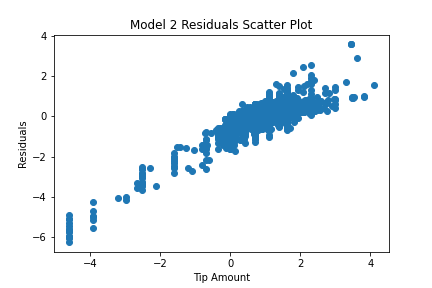

In [15]:
Image('figures/residual_plot.png')

The residual plot shows us that our second model is a much better model to use to predict tip amount. While the residual plot still shows a slight linear pattern, we can see that the random clumping around the right hand side of the graph means that our second log-log model is still a much more appropriate model for this data, compared to the first linear model. 
<br>
Further computations and analysis on this part of the project are visible in the tip_amt_prediction.ipynb notebook in the repository.

## Author Contributions

Rohan: My contributions to this homework included the filter_data function in the utils.py file that filters multiple columns in a dataframe by multiple parameters in a single function call, the tip_amt_prediction notebook where I created two linear models to predict tip amounts from select features that were favored in the tip_analysis notebook, and general repository cleanliness through the creation of a figures and tables folder that we used to store visualizations and data and display in this main.ipynb file.

Daniel: My contributions to this homework included the tip_analysis notebook that examined the relationships between tips and trip distance + total fare amount. These included scatter plot and line graph visualizations saved into the figures directory, as well as some additional analysis into tips as a share of total fare and tips by day of week. I also took part in finding the initial dataset, brainstorming analysis steps, and communicating with the owner of the datasets to clarify certain features.

   Xingrui: My contribution included the "busy_time_and_fares_analysis" notebook contains my research on the busiest hour during a day and weekday vs weekends; and and how fares change over time. Added my narrative conclusion related to my analysis to the main notebook.